### Key Features in 'world-happiness-report':

##### The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country.

- Ladder score: It is the score for happiness and liveability. The high ladder score represents the best possible life for you and low ladder score represents the worst possible life for you.
- Logged GDP per capita: It shows how much economic production value can be attributed to each individual citizen. Alternatively, this translates to a measure of national wealth since GDP market value per person also readily serves as a prosperity measure.
- Social support: It is defined in terms of social network characteristics such as assistance from family, friends, neighbours and other community members.
- Healthy life expectancy at birth: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year
- Freedom to make life choices: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.
- Generosity: Generosity is the virtue of being liberal in giving, often as gifts.
- Perceptions of corruption: Corruption is a form of dishonesty or criminal offense undertaken by a person or organization entrusted with a position of authority, to acquire illicit benefit

### Objective : 
- Based on the World happiness report of 2021, clusters are being created depending upon the scores these countries got for various parameters. The purpose is to undestand which countries are most similar when seen in terms of these parameters.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as pe
import plotly

In [2]:
df = pd.read_csv("world-happiness-report-2021.csv")

In [3]:
df.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [5]:
df_1 = df.iloc[:, [0,1,2,3,6,7,8,9,10,11]]   # Removing columns if dystopia country (hypothetical country)

In [6]:
df_1.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179


In [7]:
df_1.shape

(149, 10)

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country name                    149 non-null    object 
 1   Regional indicator              149 non-null    object 
 2   Ladder score                    149 non-null    float64
 3   Standard error of ladder score  149 non-null    float64
 4   Logged GDP per capita           149 non-null    float64
 5   Social support                  149 non-null    float64
 6   Healthy life expectancy         149 non-null    float64
 7   Freedom to make life choices    149 non-null    float64
 8   Generosity                      149 non-null    float64
 9   Perceptions of corruption       149 non-null    float64
dtypes: float64(8), object(2)
memory usage: 11.8+ KB


In [9]:
df_1.set_index(df_1["Country name"], inplace= True)

In [10]:
df_1.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,,,,
Finland,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186
Denmark,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179


In [11]:
df_1.drop(columns="Country name", inplace= True)

C:\Users\iamrr\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_1.head(2)

,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,,,
Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186
Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179


## Exploratory Data Analysis

In [13]:
df_1.describe()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,0.022001,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,0.026000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,0.043000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,0.054000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,0.070000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,0.173000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [14]:
df_1["Regional indicator"].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [15]:
reg = df_1[["Regional indicator", "Ladder score"]].groupby("Regional indicator", as_index=False).mean().sort_values(by="Ladder score", ascending=False)

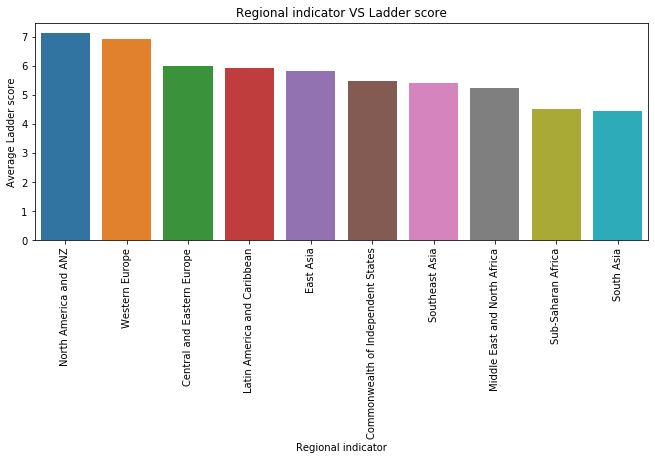

In [16]:
# Average Ladder score VS Regional indicator
plt.figure(figsize =(11,4))
sns.barplot(x= "Regional indicator", y = "Ladder score" , data=reg)
plt.title("Regional indicator VS Ladder score");
plt.xlabel("Regional indicator")
plt.ylabel("Average Ladder score");
plt.xticks(rotation=90);

##### - South Asia and Sub-Saharan Africa have the lower mean ladder score of happiness while North America and ANZ region has the highest score.

In [17]:
df_1.reset_index(inplace=True)

In [18]:
df_1.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179


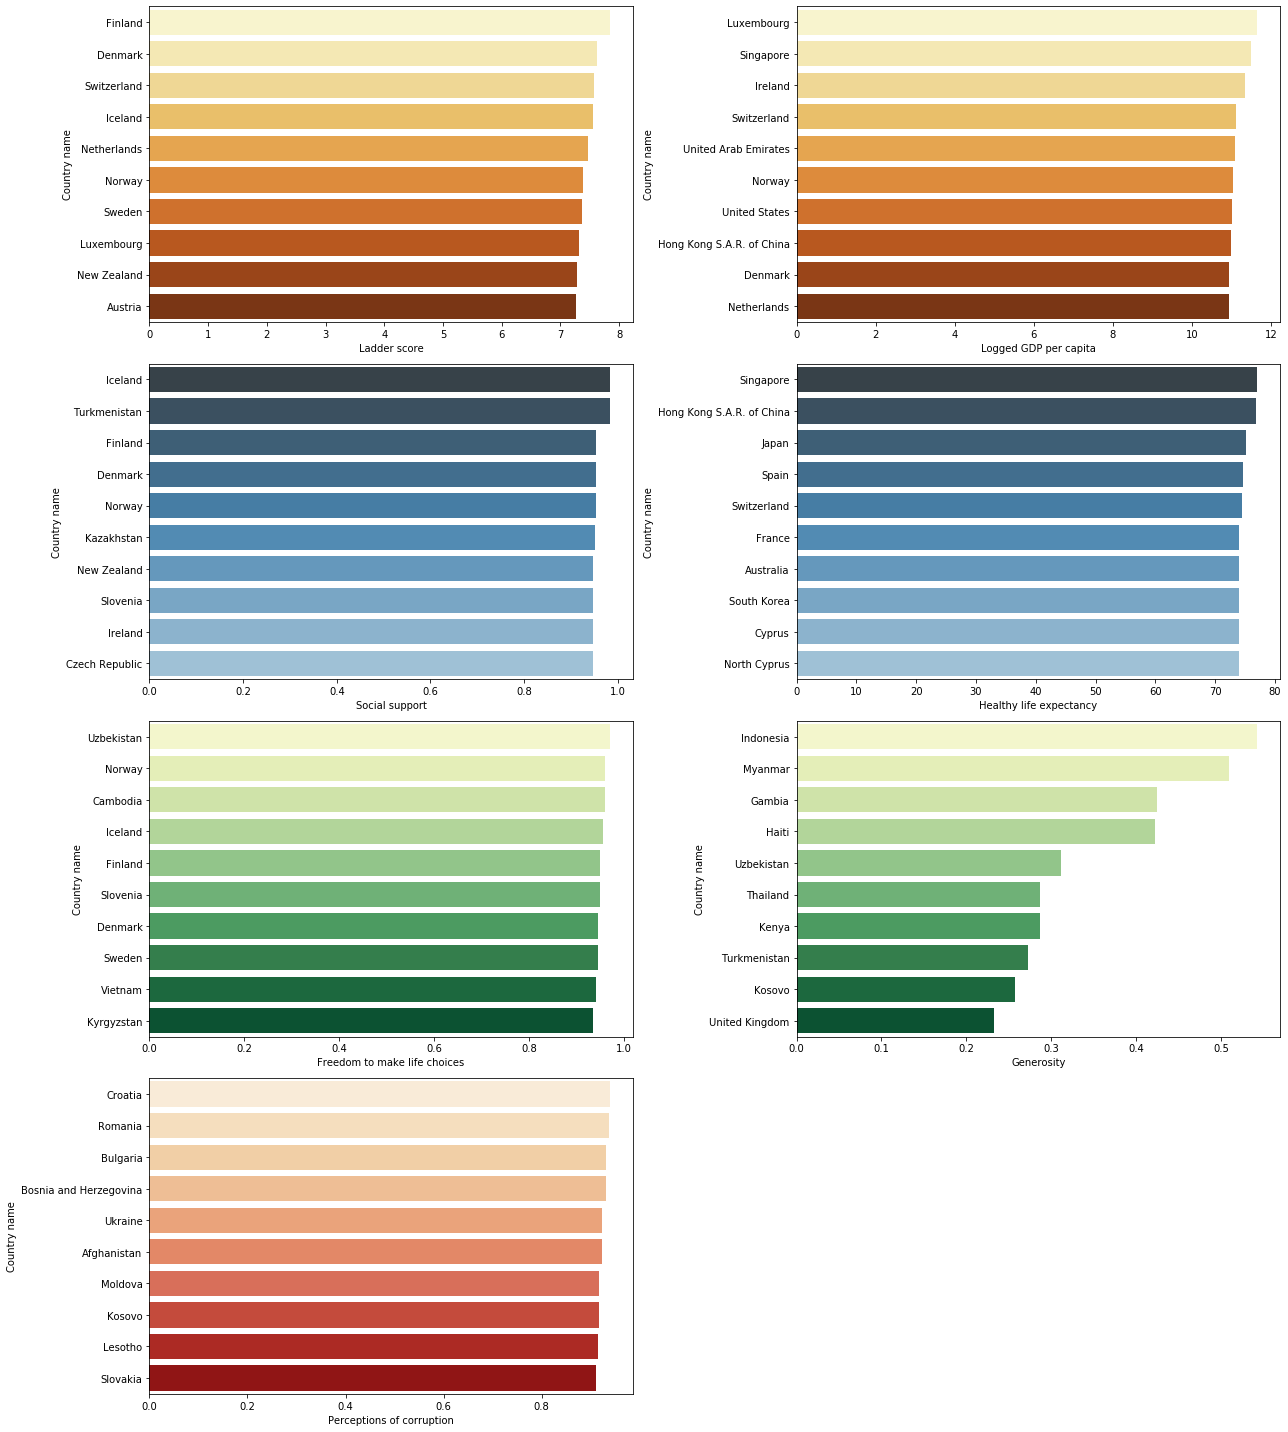

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=[18,20])
sns.barplot(y="Country name", x="Ladder score", data= df_1.nlargest(10, columns="Ladder score") , ax= ax[0,0], palette="YlOrBr");
sns.barplot(y="Country name", x="Logged GDP per capita", data= df_1.nlargest(10, columns="Logged GDP per capita") , ax= ax[0,1], palette="YlOrBr");
sns.barplot(y="Country name", x="Social support", data= df_1.nlargest(10, columns="Social support") , ax= ax[1,0], palette="Blues_d");
sns.barplot(y="Country name", x="Healthy life expectancy", data= df_1.nlargest(10, columns="Healthy life expectancy") , ax= ax[1,1], palette="Blues_d");
sns.barplot(y="Country name", x="Freedom to make life choices", data= df_1.nlargest(10, columns="Freedom to make life choices") , ax= ax[2,0], palette="YlGn");
sns.barplot(y="Country name", x="Generosity", data= df_1.nlargest(10, columns="Generosity") , ax= ax[2,1], palette="YlGn");
sns.barplot(y="Country name", x="Perceptions of corruption", data= df_1.nlargest(10, columns="Perceptions of corruption") , ax= ax[3,0], palette='OrRd');
fig.delaxes(ax[3,1]);    # to delete the last unused graph axes
plt.tight_layout();   # to handle the overlapping labels between adjacent graphs

##### In above figure, bar charts are plotted for top 10 countries against Ladder score, Logged gdp per capita, Social support, Healthy life expectancy, Freedom to make life choices , Generosity and Perceptions of corruptions. Except Generosity, the other scores remain similar for top 10 countries. Generosity varies sharply even within top 10 countires.  

In [20]:
df_1.nlargest(10, "Generosity")

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
81,Indonesia,Southeast Asia,5.345,0.056,9.365,0.811,62.236,0.873,0.542,0.867
125,Myanmar,Southeast Asia,4.426,0.052,8.541,0.779,59.302,0.876,0.509,0.660
97,Gambia,Sub-Saharan Africa,5.051,0.089,7.686,0.690,55.160,0.697,0.424,0.746
142,Haiti,Latin America and Caribbean,3.615,0.173,7.477,0.540,55.700,0.593,0.422,0.721
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,8.836,0.918,65.255,0.970,0.311,0.515
53,Thailand,Southeast Asia,5.985,0.047,9.805,0.888,67.401,0.884,0.287,0.895
120,Kenya,Sub-Saharan Africa,4.607,0.072,8.361,0.688,60.704,0.779,0.287,0.825
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,9.629,0.983,62.409,0.877,0.273,0.888
32,Kosovo,Central and Eastern Europe,6.372,0.059,9.318,0.821,63.813,0.869,0.257,0.917
16,United Kingdom,Western Europe,7.064,0.038,10.707,0.934,72.500,0.859,0.233,0.459


- With the above data, we see that countries belonging to regions with lower ladder scores have higher generosity scores when seen among top 10 countries

In [21]:
df_1.iloc[:, [2,4,5,6,7,8,9]].corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


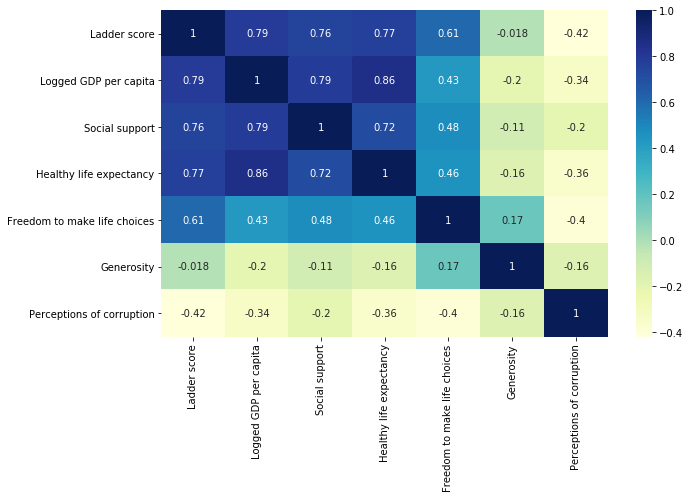

In [22]:
fig, ax = plt.subplots(figsize = [10,6])
sns.heatmap(df_1.iloc[:, [2,4,5,6,7,8,9]].corr(), annot= True, cmap="YlGnBu");  # annot = to show data on each cell, cmap = colormap

- From the above heatmap, we see that Ladder score of happiness has high positive corelation with Logged GDP per capita, Social support and Healthy life expectancy.
- Ladder score has moderate positive corelation with Freedom to make life choices
- Ladder score has moderate negative corelation with Perceptions of corruption
- Ladder score has strong negative corelation with Generosity

#### Comparing India with country with max ladder score, median ladder score, and lowest ladder score to understand the difference

In [23]:
highest = df_1[df_1["Ladder score"] ==df_1["Ladder score"].max()]
lowest = df_1[df_1["Ladder score"] ==df_1["Ladder score"].min()]
avg = df_1[df_1["Ladder score"] ==df_1["Ladder score"].median()]
ind = df_1[df_1["Country name"]=="India"]

In [24]:
comp = pd.concat([highest, avg, ind, lowest])

In [25]:
comp

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186
74,Belarus,Commonwealth of Independent States,5.534,0.047,9.853,0.910,66.253,0.650,-0.180,0.627
138,India,South Asia,3.819,0.026,8.755,0.603,60.633,0.893,0.089,0.774
148,Afghanistan,South Asia,2.523,0.038,7.695,0.463,52.493,0.382,-0.102,0.924


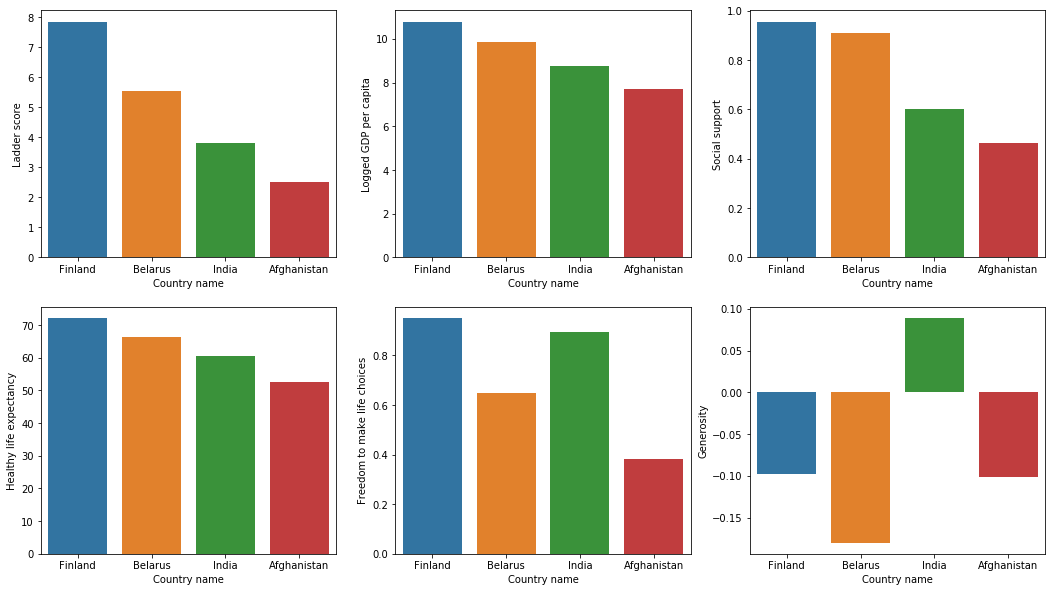

In [26]:
fig, ax = plt.subplots(nrows =2, ncols=3, figsize=(18,10))
sns.barplot(x = comp["Country name"], y = comp["Ladder score"], ax=ax[0,0])
sns.barplot(x = comp["Country name"], y = comp["Logged GDP per capita"], ax=ax[0,1])
sns.barplot(x = comp["Country name"], y = comp["Social support"], ax=ax[0,2])
sns.barplot(x = comp["Country name"], y = comp["Healthy life expectancy"], ax=ax[1,0])
sns.barplot(x = comp["Country name"], y = comp["Freedom to make life choices"], ax=ax[1,1])
sns.barplot(x = comp["Country name"], y = comp["Generosity"], ax=ax[1,2]);

**- India is the most generous country among the four.**

## Preprocessing

In [27]:
df_1.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179


In [28]:
df_data = df_1.drop(["Regional indicator", "Standard error of ladder score"], axis = 1)

In [29]:
df_data.set_index("Country name", inplace= True)
df_data.head(2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,
Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179


In [30]:
df_data.columns

Index(['Ladder score', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [31]:
df_data.head(2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,
Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179


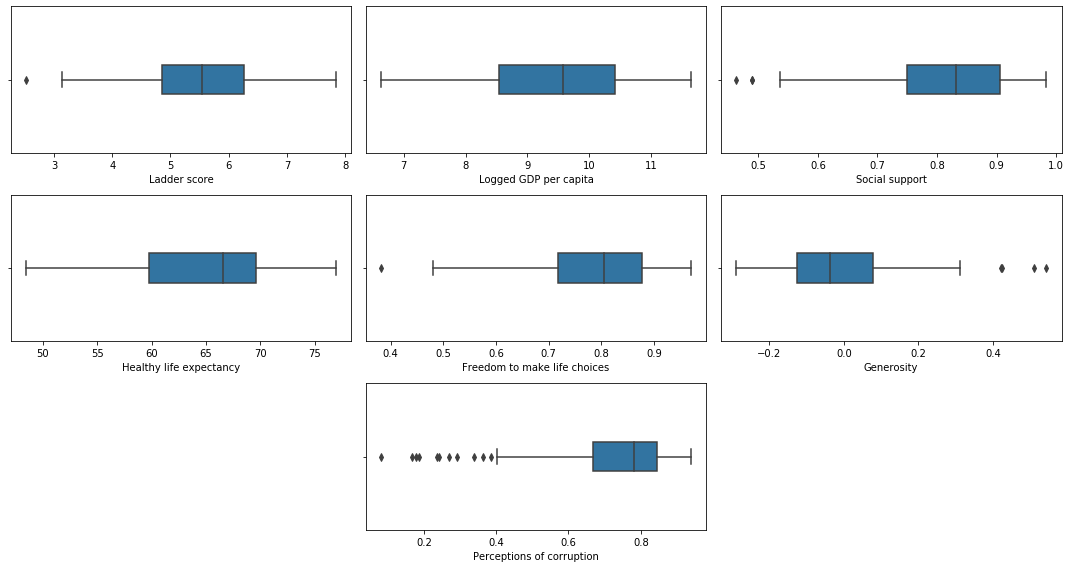

In [32]:
# df_data.boxplot(figsize=(15,6));
# plt.xticks(rotation=45);

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
sns.boxplot(df_data["Ladder score"], ax= ax[0,0], width=0.2);
sns.boxplot(df_data["Logged GDP per capita"], ax= ax[0,1], width=0.2);
sns.boxplot(df_data["Social support"], ax= ax[0,2], width=0.2);
sns.boxplot(df_data["Healthy life expectancy"], ax= ax[1,0], width=0.2);
sns.boxplot(df_data["Freedom to make life choices"], ax= ax[1,1], width=0.2);
sns.boxplot(df_data["Generosity"], ax= ax[1,2], width=0.2);
sns.boxplot(df_data["Perceptions of corruption"], ax= ax[2,1], width=0.2);
fig.delaxes(ax[2,0]);  
fig.delaxes(ax[2,2]);
plt.tight_layout(); 

**-There are outliers is Ladder score, social support, generosity, freedom to make life choices and perceptions of corruption**

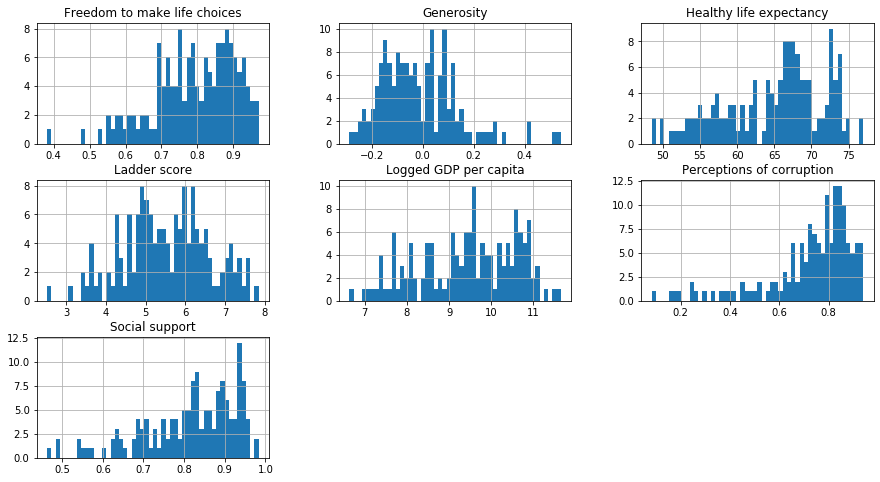

In [33]:
df_data.hist(figsize=(15,8), bins = 50);

#### I will scale the above data :-

- Since the data features are in different ranges and there are outliers present in the data, so I will use Robust scaling to scale the data before PCA.
- Robust standardization or robust data scaling:  approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

- This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.

- value = (value – median) / (p75 – p25)
- The resulting variable has a zero mean and median and a standard deviation of 1, although the outliers are still present with the same relative relationships to other values.

In [34]:
from sklearn.preprocessing import RobustScaler

rob = RobustScaler()
df_scaled = rob.fit_transform(df_data)

df_scaled= pd.DataFrame(df_scaled, columns=df_data.columns)
df_scaled.head(2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.645046,0.641489,0.787097,0.550827,0.911950,-0.302439,-3.342697
1,1.486814,0.725532,0.787097,0.622270,0.893082,0.321951,-3.382022


In [35]:
df_data.describe() # checking standard deviation in original data

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [36]:
df_scaled.describe()  # The standard deviation of data is now on the similar scale. Compared to the original data, data is scaled.

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,-0.000828,-0.072762,-0.111323,-0.164340,-0.078004,0.101784,-0.300845
std,0.765448,0.616277,0.741220,0.690145,0.712779,0.734911,1.006889
min,-2.146115,-1.560638,-2.380645,-1.849867,-2.654088,-1.229268,-3.926966
25%,-0.486101,-0.546809,-0.529032,-0.694121,-0.540881,-0.439024,-0.640449
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.513899,0.453191,0.470968,0.305879,0.459119,0.560976,0.359551
max,1.645046,1.105319,0.974194,1.056338,1.044025,2.819512,0.887640


**- Scaled data still has outliers and some features are skewed, but variables have similar scales now**

In [37]:
df_scaled.index = df_data.index
df_scaled.head(2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,
Finland,1.645046,0.641489,0.787097,0.550827,0.911950,-0.302439,-3.342697
Denmark,1.486814,0.725532,0.787097,0.622270,0.893082,0.321951,-3.382022


### PCA on this scaled data to handle multicollinearity

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3,  random_state=250) 

In [39]:
df_pca = pca.fit_transform(df_scaled)

In [40]:
df_pca = pd.DataFrame(data= df_pca, columns=[f"PC{i}" for i in range(df_pca.shape[1])])

In [41]:
np.sum(pca.explained_variance_) , np.sum(pca.explained_variance_ratio_)

(3.497259530568262, 0.8627989662424069)

In [42]:
pca.explained_variance_ratio_

array([0.52348895, 0.21515436, 0.12415566])

In [43]:
df_pca.head(2)

,PC0,PC1,PC2
0,-3.388624,1.339949,-1.092996
1,-3.379034,1.651316,-0.671262


In [44]:
df_pca.shape, df_data.shape

((149, 3), (149, 7))

In [45]:
df_pca.index = df_data.index
df_pca.head(2)

,PC0,PC1,PC2
Country name,,,
Finland,-3.388624,1.339949,-1.092996
Denmark,-3.379034,1.651316,-0.671262


## K-means clustering process 
- A cluster refers to a collection of data points aggregated together because of certain similarities.
- In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster.
- The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [46]:
# Checking how many clusters should be made

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_dict ={}
sil_dict ={}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=250)
    kmeans.fit(df_pca)
    inertia_dict[i] = kmeans.inertia_
    score = silhouette_score(df_pca, kmeans.labels_, metric='euclidean')
    sil_dict[i] = score

print(inertia_dict)
print(sil_dict)
    

{2: 309.7496059716681, 3: 196.86826315485948, 4: 164.7426260024966, 5: 138.70614393985315, 6: 124.47731103320646, 7: 109.40464883126972, 8: 100.4904001939215, 9: 88.70990610456516, 10: 79.94827363211246}
{2: 0.3689247465284196, 3: 0.3986587627163907, 4: 0.3524361230132045, 5: 0.34626258181938574, 6: 0.3173061713525937, 7: 0.31522083273986407, 8: 0.28677879831902386, 9: 0.32008321719133753, 10: 0.31597868700270126}


- The Silhouette score is maximum for 3 clusters, but the value of 0.398 is still very low (a good cluster should have score of 0.7), but i will still move forward to see the clusters formed.

### Cluster Inertia plot for different number of clusters
- Inertia can be recognized as a measure of how internally coherent clusters are.

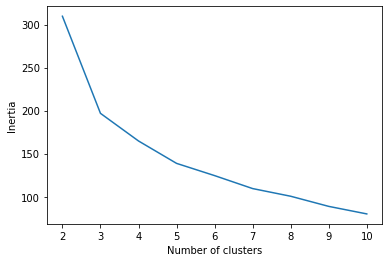

In [47]:
inertias = pd.DataFrame({"Clusters":list(inertia_dict.keys()) , "Inertia":list(inertia_dict.values())})
plt.plot(inertias.Clusters,inertias.Inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");

**- Since 3 clusters are giving the highest silhouette score among all 10, so I will keep the cluster number as 3 for now**

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state= 250)   # number of clusters to be formed taken as 3
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=250, tol=0.0001, verbose=0)

### Show cluster membership

In [49]:
df_pca["Cluster id"] = kmeans.labels_
df_pca.head()

,PC0,PC1,PC2,Cluster id
Country name,,,,
Finland,-3.388624,1.339949,-1.092996,1
Denmark,-3.379034,1.651316,-0.671262,1
Switzerland,-3.096783,1.124515,-0.482350,1
Iceland,-2.215128,-0.146119,1.181967,1
Netherlands,-2.808975,1.352516,0.193425,1


In [50]:
clusters={}
for i in range(0,3):
    clusters[i] = ', '.join((df_pca[df_pca["Cluster id"] == i].index).tolist())
    
clusters

{0: 'Israel, Costa Rica, Czech Republic, United States, Belgium, Bahrain, Taiwan Province of China, Saudi Arabia, Spain, Italy, Slovenia, Guatemala, Kosovo, Slovakia, Brazil, Mexico, Jamaica, Lithuania, Cyprus, Panama, Chile, Poland, Kazakhstan, Romania, Kuwait, Serbia, El Salvador, Mauritius, Latvia, Colombia, Hungary, Thailand, Nicaragua, Japan, Argentina, Portugal, Honduras, Croatia, Philippines, South Korea, Peru, Bosnia and Herzegovina, Moldova, Ecuador, Kyrgyzstan, Greece, Bolivia, Mongolia, Paraguay, Montenegro, Dominican Republic, North Cyprus, Belarus, Russia, Tajikistan, Vietnam, Libya, Malaysia, China, Armenia, Bulgaria, Maldives, Azerbaijan, Albania, North Macedonia, Turkmenistan, South Africa, Turkey, Venezuela, Ukraine, Gabon, Lebanon, Jordan, Sri Lanka',
 1: 'Finland, Denmark, Switzerland, Iceland, Netherlands, Norway, Sweden, Luxembourg, New Zealand, Austria, Australia, Germany, Canada, Ireland, United Kingdom, France, Malta, United Arab Emirates, Uruguay, Singapore, Es

#### In the above output, we see each of the 3 clusters formed with countries that belong to them. Most similar countries are clustered together.

In [51]:
# To check each cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_pca.drop("Cluster id", axis=1).columns)
centroids

,PC0,PC1,PC2
0,-0.285007,-0.670041,0.077268
1,-2.409325,0.887647,-0.119878
2,1.471250,0.560906,-0.056935


In [52]:
df_pca.iloc[:, [0,1,2]].groupby(kmeans.labels_).mean()

,PC0,PC1,PC2
0,-0.285007,-0.670041,0.077268
1,-2.409325,0.887647,-0.119878
2,1.471250,0.560906,-0.056935


### Cluster parwise distances

In [53]:
# Euclidean distance of each cluster center with every other cluster center
from sklearn.metrics import pairwise
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric= "euclidean"))

,0,1,2
0,0.000000,2.641588,2.148879
1,2.641588,0.000000,3.894815
2,2.148879,3.894815,0.000000


In [54]:
# Visaulizing 3-d clusters
fig = pe.scatter_3d(x= df_pca.PC0, y = df_pca.PC1, z = df_pca.PC2, color= kmeans.labels_, hover_name=df_pca.index)

In [57]:
fig.update_traces(marker = dict(size=1, 
                               line= dict(width=0.4, color='DarkSlateGrey')),
                 selector= dict(mode='markers'))  # if not set then figure would be very large
fig.show();

## Hierarchical Clustering

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage

df_clus = df_pca.copy()
df_clus.head(2)

,PC0,PC1,PC2,Cluster id
Country name,,,,
Finland,-3.388624,1.339949,-1.092996,1
Denmark,-3.379034,1.651316,-0.671262,1


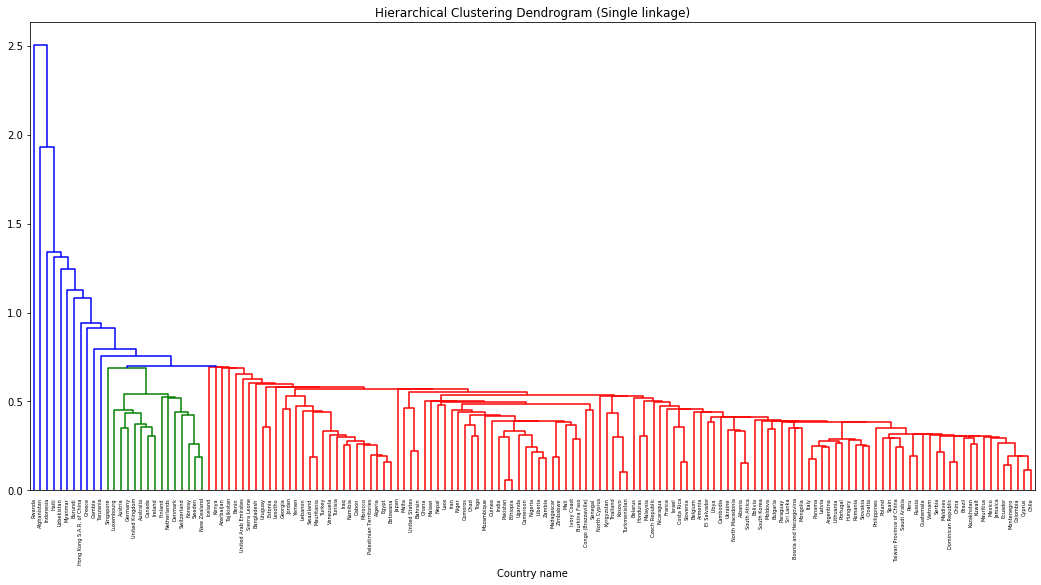

In [98]:
Z = linkage(df_clus.iloc[:,:-1], method='single')   # Single linkage 

fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel("Country name")
dendrogram(Z, labels=df_clus.index, color_threshold=0.7)
plt.show()

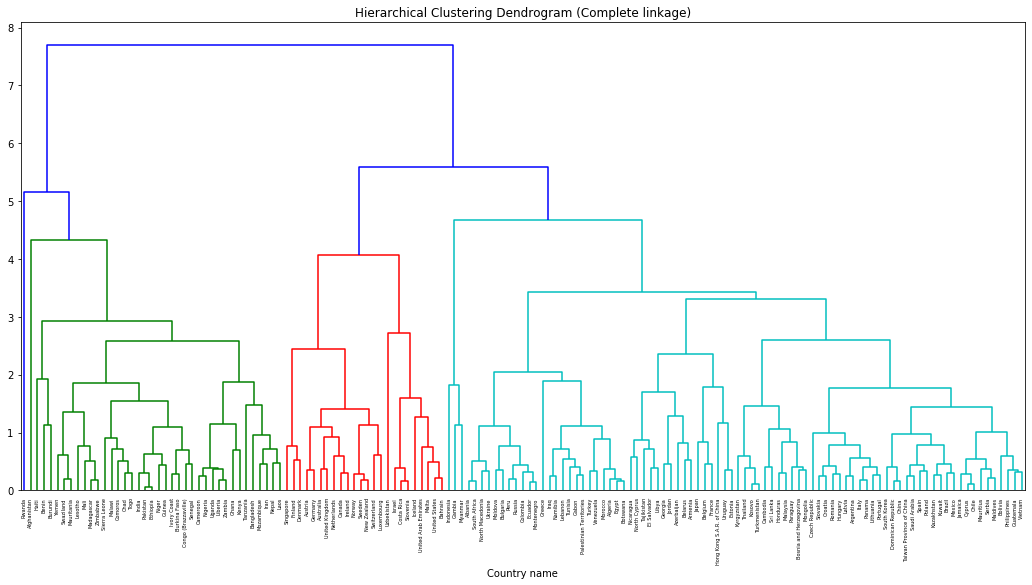

In [101]:
Z = linkage(df_clus.iloc[:,:-1], method='complete')   # Complete linkage 

fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel("Country name")
dendrogram(Z, labels=df_clus.index, color_threshold=5)
plt.show()

### Further study:

- Countries falling in same clusters can be studied together to understand the relation between them in terms of all the features and then future social policies could be made accordingly to improve upon the factors.

- Countries with lower scores can study the factors from the cluster contraining countries with higher scores to gain insights about their current policies